<a href="https://colab.research.google.com/github/modraqueeb/IndusVisionIntern/blob/main/Day5_MLintern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Create Kalman Filter
kalman = cv2.KalmanFilter(4, 2)

# State vector (x, y, dx, dy)
kalman.statePre = np.zeros((4, 1), np.float32)
kalman.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
kalman.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
kalman.processNoiseCov = np.array([[1e-4, 0, 0, 0], [0, 1e-4, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
kalman.measurementNoiseCov = np.array([[1, 0], [0, 1]], np.float32)

# Initialize video capture
cap = cv2.VideoCapture('')  # Provide a valid path or use an uploaded video

# Read the first frame
ret, frame = cap.read()
x, y, w, h = 200, 150, 50, 50  # Manually set the object region

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Create a measurement vector (detected object's position)
    measurement = np.array([[np.float32(x + w / 2)], [np.float32(y + h / 2)]])  # Center of the box

    # Correct the state with the measurement
    kalman.correct(measurement)

    # Predict the next state (position)
    predicted = kalman.predict()

    # Draw the predicted bounding box
    predicted_x, predicted_y = int(predicted[0]), int(predicted[1])
    cv2.rectangle(frame, (predicted_x - w // 2, predicted_y - h // 2), (predicted_x + w // 2, predicted_y + h // 2), (0, 0, 255), 2)

    # Use cv2_imshow instead of cv2.imshow
    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


**Connected Component Analysis (CCA) in Image Processing**

Connected Component Analysis (CCA) is a technique used in image processing to detect and analyze distinct objects (or components) in a binary image. It is used to identify and group pixels that are connected to each other based on specific connectivity criteria (e.g., 4-connected or 8-connected). CCA is commonly used in object detection, segmentation, and labeling of individual components.

**Steps in Connected Component Analysis:**

**Convert Image to Binary:**
CCA operates on binary images (images with pixel values of 0 and 255, representing black and white pixels, respectively). If the image is in grayscale, thresholding is typically applied to convert it into a binary image.

**Find Connected Components:**
The image is scanned pixel by pixel. When a pixel with value 255 (white) is found, the algorithm checks for neighboring pixels that are also part of the object and assigns them the same label.
The connectivity criterion (4-connected or 8-connected) is used to determine whether two pixels are connected.

**Labeling:**
Each connected component (group of connected pixels) is assigned a unique label, allowing you to distinguish between different objects in the image.

**Analyze the Components:**
After labeling the components, properties like area, centroid, bounding box, and shape can be calculated to analyze the individual objects.

**Output:**
The final output includes the labeled components, which can be used for further analysis or visualization.


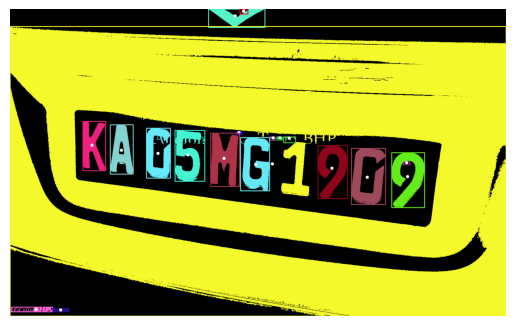

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread("/content/numberplate.JPG", cv.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, binary = cv.threshold(image, 127, 255, cv.THRESH_BINARY_INV)

# Perform connected component analysis
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(binary, connectivity=8)

# Create an output image to visualize the labeled components
output_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

# Randomly color each connected component
for i in range(1, num_labels):  # Skip the background (label 0)
    x, y, w, h, area = stats[i]
    centroid_x, centroid_y = centroids[i]

    # Filter components based on area (e.g., remove noise)
    if area > 50:  # Adjust the threshold as needed
        # Assign a random color to the component
        color = np.random.randint(0, 255, size=(3,), dtype=int)
        output_image[labels == i] = color

        # Optionally, annotate the output image with bounding boxes and centroids
        cv.rectangle(output_image, (x, y), (x + w, y + h), color.tolist(), 2)
        cv.circle(output_image, (int(centroid_x), int(centroid_y)), 5, (255, 255, 255), -1)

plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

HOMOGRAPHY - Homography is a mathematical relationship that defines how one image can be transformed into another. In image processing, it helps to relate the points in one image to the corresponding points in another image taken from a different viewpoint.

In simpler words:

Imagine you took two photos of the same object, but from different angles or perspectives.

The two photos won’t look exactly the same due to the different viewpoints, but they’re of the same scene.

Homography is the mathematical transformation that helps us "align" these two images by mapping points in one image to their corresponding points in the other image.

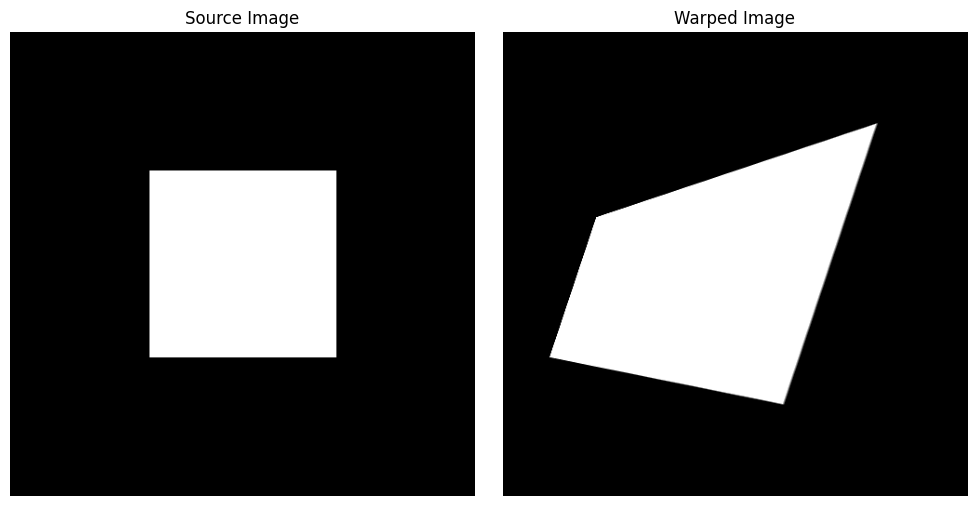

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic source image (500x500 with a white square in the center)
source_image = np.zeros((500, 500, 3), dtype=np.uint8)
cv.rectangle(source_image, (150, 150), (350, 350), (255, 255, 255), -1)

# Define points in the source image (a square)
src_points = np.array([[150, 150], [350, 150], [350, 350], [150, 350]], dtype=np.float32)

# Define corresponding points for the destination (warped rectangle)
dst_points = np.array([[100, 200], [400, 100], [300, 400], [50, 350]], dtype=np.float32)

# Compute the homography matrix
H, _ = cv.findHomography(src_points, dst_points)

# Warp the source image to the destination perspective
warped_image = cv.warpPerspective(source_image, H, (500, 500))

# Convert images from BGR to RGB for Matplotlib
source_image_rgb = cv.cvtColor(source_image, cv.COLOR_BGR2RGB)
warped_image_rgb = cv.cvtColor(warped_image, cv.COLOR_BGR2RGB)

# Plot the images using Matplotlib
plt.figure(figsize=(10, 5))

# Source image
plt.subplot(1, 2, 1)
plt.imshow(source_image_rgb)
plt.title("Source Image")
plt.axis("off")

# Warped image
plt.subplot(1, 2, 2)
plt.imshow(warped_image_rgb)
plt.title("Warped Image")
plt.axis("off")

plt.tight_layout()
plt.show()

SHAPE ANALYSIS -
Shape analysis is a technique in image processing where we identify and analyze the geometrical shapes present in an image. Common tasks in shape analysis include detecting contours, calculating the area of the shape, finding the perimeter, and calculating shape properties like the centroid, aspect ratio, etc.

Here’s a simple code for shape analysis in Python using OpenCV:

**Steps involved in shape analysis:**

**Convert to Grayscale:** Convert the image to grayscale for easier processing.

**Thresholding or Edge Detection:** This step helps isolate the shapes.

**Find Contours:** Identify the boundaries of the shapes in the image.

**Shape Features:** Analyze each contour (e.g., area, perimeter, shape).

**Draw and Label Shapes:** Optionally, draw the contours and label each shape.

Contour - Area: 732010.0, Perimeter: 3482.0, Aspect Ratio: 1.4514767932489452, Centroid: (515, 355)


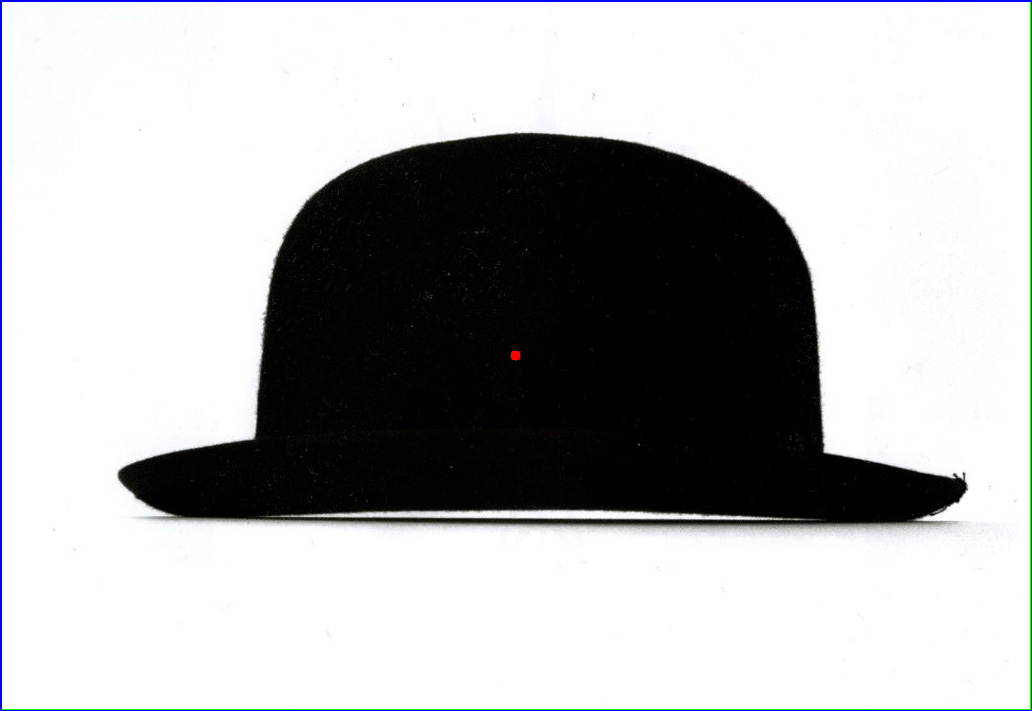

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import this for Colab

# Step 1: Load the image
image = cv2.imread('/content/cap.jpg')  # Replace with your image path
if image is None:
    print("Error: Image not loaded correctly.")
    exit()

# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply thresholding or Canny edge detection
_, thresholded = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
# Alternatively, you can use edge detection if you prefer:
# thresholded = cv2.Canny(gray_image, 100, 200)

# Step 4: Find contours
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Iterate through each contour
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # Calculate the perimeter of the contour
    perimeter = cv2.arcLength(contour, True)

    # Calculate the bounding rectangle around the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Optionally: Calculate the aspect ratio of the bounding box
    aspect_ratio = float(w) / h if h != 0 else 0

    # Calculate the centroid (center of mass) of the shape
    moments = cv2.moments(contour)
    if moments["m00"] != 0:
        cx = int(moments["m10"] / moments["m00"])
        cy = int(moments["m01"] / moments["m00"])
    else:
        cx, cy = 0, 0

    # Print the analysis for each shape
    print(f"Contour - Area: {area}, Perimeter: {perimeter}, Aspect Ratio: {aspect_ratio}, Centroid: ({cx}, {cy})")

    # Step 6: Draw the contour on the image
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # Green color for contours
    cv2.circle(image, (cx, cy), 5, (0, 0, 255), -1)  # Red color for centroid

    # Optional: Draw bounding box and label
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue bounding box
    cv2.putText(image, f'Aspect Ratio: {aspect_ratio:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Step 7: Show the final image with contours and labels (using cv2_imshow for Colab)
cv2_imshow(image)


HISTOGRAM EQUALIZATION -

Step 1: Compute the histogram to count the occurrences of each intensity value.

Step 2: Calculate the cumulative distribution function (CDF).

Step 3: Normalize the CDF to map it to the full intensity range (0 to 255).

Step 4: Map the original pixel values to the new values based on the normalized
CDF, resulting in an image with improved contrast.

Histogram equalization is especially useful when the image has low contrast, such as in images with poor lighting conditions or medical images.

**Why is Contrast Important?**

**Visibility:** Good contrast makes objects in the image more distinguishable and easier to identify.

**Image Quality:** High contrast can make an image appear sharper and more visually appealing, while low contrast may result in a dull or washed-out image.

**Analysis:** In many image analysis applications (e.g., medical imaging, remote sensing), high contrast can help in identifying finer details, shapes, and boundaries more effectively.

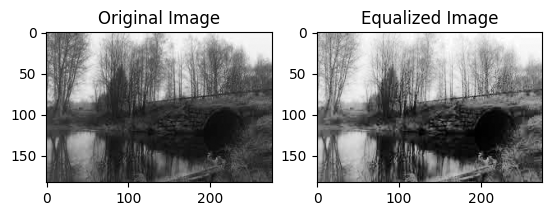

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/CONTRAST.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Plot the original and equalized image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.show()